# 2110203 COMP ENG MATH II (CEDT) -- Stats Homework II

**Instructions**:
- Only Problem 4 and 6 will be graded. The rest are for your practise.
- Submit as PDF file. You can create PDF file using File -> Print from the Google Colab menu.

**DO NOT USE scipy.stats.ttest_1samp OR RELATED FUNCTION UNLESS EXPLICITLY INSTRUCTED**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Problem 1: Hamtaro and his entertainment


Hamtaro operates an entertainment website called HamHub.

Last Monday, the most famous website in this field of entertainment was blocked by the government. Hearing the news, Hamtaro wants to know whether the blockade has a significant effect on the number of HamHub's visitors?

*   Before last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(10000, \sigma^2)$.
*   After last Monday, Hamtaro spent ten days collecting the number of users.
```
X1 = array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])
```
1. Can Hamtaro conclude that the blockade significantly increases the number of visitors with a significant level of 0.001?
2. If the sample mean and variance are held the same, what is the minimum number of samples Hamtaro need to reject the null hypothesis? For the same observation effect, larger sample size will result in a significant result.

In [2]:
X1 = np.array([10190.25479236, 10082.65748517, 10161.37971691, 10042.27783459,
       10129.73858138,  9962.73586162, 10187.78833611, 10013.48007958,
       10372.98760763, 10238.55408072])

def calculate_sample_variance(X):
  # HINT: Look up parameter ddof of numpy.var
  # [YOUR CODE HERE]
  return np.var(X, ddof=1)

def studentized_mean(X, mu0):
  # [YOUR CODE HERE]
  xbar = np.mean(X)
  s = np.sqrt(calculate_sample_variance(X))
  return (xbar-mu0)/(s/np.sqrt(len(X)))

t_score = studentized_mean(X1, 10000)

# [YOUR CODE HERE]
# Calculate p-value and decide of hamtaro can reject the null hypothesis or not.
# HINT: scipy.stats.t
pvalue = stats.t.sf(t_score, df=len(X1)-1)
if pvalue < 0.001:
  print('Reject null')
else:
  print('Not reject null')

# Check if it is equal to the library
result = stats.ttest_1samp(X1, 10000, alternative='greater')
result.pvalue, pvalue

Not reject null


(0.0026942708869087556, 0.0026942708869087556)

# Problem 2: T-Test

Hamtaro performs a t-test for the null hypothesis $H_0: \mu=10$ at significance level $\alpha=0.05$ from a dataset consisting of $n=16$ elements with sample mean $11$ and sample variance $4$.
1. Should we reject the null hypothesis in favor of $H_a: \mu \neq 10$
2. What if we test against $H_{a^{'}}: \mu >10$ ?

In [3]:
mu = 11
s2 = 4
n = 16

#[YOUR CODE HERE]
t_score = (mu-10)/(np.sqrt(s2)/np.sqrt(n))
pvalue_1tail = stats.t.sf(t_score, df=n-1)
pvalue_2tail = stats.t.sf(t_score, df=n-1) + stats.t.cdf(-t_score, df=n-1)

print('1. p-value={} {}'.format(pvalue_2tail, 'Reject null' if pvalue_2tail < 0.05 else 'Do not reject null'))
print('2. p-value={} {}'.format(pvalue_1tail, 'Reject null' if pvalue_1tail < 0.05 else 'Do not reject null'))

1. p-value=0.0639450072847202 Do not reject null
2. p-value=0.0319725036423601 Reject null


# Problem 3: Hamtaro and his entertainment #2

The story in this problem is a parallel universe of problem 1.

Last Monday, Hamtaro added the new channel to the website, and he wanted to know its effects on the number of visitors. However, the most famous website in this field of entertainment was also blocked by the government on the same day. Since there was no sign of unblocking from the government, Hamtaro could not perform a hypothesis testing on only the factor of adding the new channel. How could Hamtaro know that the changes from adding the new channel are significant?

There are four scenarios in this problem:
1.   Before the last Monday, the average number of visitors was $x_0 \sim \mathcal{N}(\mu_0, \sigma^2)$ (no block + no new channel).
2.  After the last Monday, the average number of visitors are $x_1 \sim \mathcal{N}(\mu_1, \sigma^2)$ (block + new channel).
3.  Days after removing the channel, the average number of visitors are $x_2 \sim \mathcal{N}(\mu_2, \sigma^2)$ (block + no new channel).
4.  In an imaginative scenario that the new channel is added but the most famous website haven't been blocked, the average number of visitors is $x_3 \sim \mathcal{N}(\mu_3, \sigma_3^2)$ (no block + new channel).

Assuming that a user decides to visit
the website because of the blockade, a new channel, or none of the two (independent).

1. Hamtaro found the p-value of 0.03 from doing a t-test on $H_a:x_1 > x_0$. Can he conclude that adding the new channel significantly increases the number of visitors? Justify your answer.
2. Hamtaro did another t-test and found the p-value of 0.1 from testing $H_a: x_1 > x_2$. Does he now have enough information to conclude anything about $x_3$ ?
3. Does the current setups, 1. and 2., lead to the final question about the significance of adding the new channel?
  * If yes, what should you do next to get the final answer?
  * If no, Can we use the hypothesis testing answer to solve this problem?
    * If yes, design your testing, describe assumptions you made.
    * If no, explain why.

## Answer

1. No. Though the difference may significant, either blocking website and adding channel can affects the difference. Hamtaro cannot conclude which one incrases view significantly from the experiment in 1.

2. Since 0.1 is lower than the common significant level, which usually less than 0.05, Hamtaro may not reject the null hypothesis. Thus, he cannot conclude that adding a new channel significantly increases the number of visitors if another site is already blocked.

3. We know that:
   - Adding channels and blocking sites affect the number of visitor independently
   - The number of visitors increases significantly after blocking sites and adding channels
   - Removing a channel does not significantly change the number of visitors

 Unless we use the larger significant level for 2., we have to conclude that adding a new channel probably does not significantly affect the number of visitor.

# Problem 4: Hamtaro and his casino

After opening HamHub for a short while, the website was also banned by the government since it contains some 'immoral' videos. Hamtaro then moves on and follows his other passionate dream of creating a gambling empire. Therefore, he hones his skills on public gambling websites which can be easily found even if they are illegal.

After playing for a while, he notices that the online gambling business has great business potential since the risk of gambling websites being banned is much lower than his previous entertainment business. Thus, he decides to open his own online casino.

At the opening date, he offers only a dice game.
The rule is simple, the player selects a number and rolls a die. The player will receive a reward if the rolled number is the same as the one he chooses.
Hamtaro wants to maximize his profit by cheating using a baised die. Since it is an online casino, he could easily change the biasness of the die after the player selects a number. However, the player is not a fool and would notice if it is too biased.

As a player,
1. Formulate the null hypothesis $H_0$ and alternative hypothesis $H_A$ to investigate the biasness of the dice.
2. Should the $H_A$ be one-sided or two-sided? What are the differences and benefits over another in this problem?
3. The player found the selected number is rolled out 3 out of 30 attempts. If he wants no more than $10\%$ of type-I error, can he reject the $H_0$? Justify your answer.
4. If the player plays 200 games, what is the rejection region if he wants no more than $10\%$ type-I error?
5. What would be the result in 4. if the true distribution is approximated by the Normal distribution?

As Hamtaro,

6. The mastermind Hamtaro observes that players will play no more than 200 games a day. He knows that some players studied COMP ENG MATH 2 and might perform hypothesis testing to check whether Hamtaro cheats. Hamtaro assumes that the players will use a significant level of $0.01$. He thinks that it is safe enough if the probability of being caught by a player is less than $0.05$. What should be the lowest probability of rolling the selected number? (How much bias can he put in the dice) Answer in floating number with a precision of 3.

7. What if Hamtaro accepts the probability of being caught $=0.01$ instead? Answer in floating number with the precision of 5.

(Hint: Problem 6 and 7 are related to test power)


## Answer

1. $H_0$: the selected number should be rolled out one if for six turns.\
$H_0: N_s = N/6$ where $N=\sum_{i=1}^{6} N_i$ \
$H_A: N_s \neq N/6$.

2. For the correctness, it should be two sides. However, one-sided testing is also fine becuase you'll be exploited only if $N_s < N/6$. From now on, we will use Ha: N_s < N/6 as we don't care the correctness if we're winning.


In [4]:
# Problem 3
N = 30
p = 1/6
Ns = 3
alpha = 0.1

pvalue = stats.binom.cdf(Ns, N, p)

print("p-value = {}".format(pvalue))
if pvalue < alpha:
  print('Reject null')
  print('Enough evidence that the casio is cheating at 10% significant level.')
else:
  print('Not reject null')
  print('Not enough evidence that the casio is cheating at 10% significant level.')

p-value = 0.23961952685801308
Not reject null
Not enough evidence that the casio is cheating at 10% significant level.


In [5]:
# Problem 4
N = 200
p = 1/6
alpha = 0.1

# PPF is reverse CDF
Ns = stats.binom.ppf(alpha, N, p) - 1

print('Critical value = {}'.format(Ns))
print('p-value = {}'.format(stats.binom.cdf(Ns, N, p)))

Critical value = 26.0
p-value = 0.09453848341113857


In [6]:
# Problem 5
N = 200
p = 1/6
alpha = 0.1

mu = N*p
std = (N*p*(1-p))**0.5

Ns = math.floor(stats.norm.ppf(alpha, mu, std))

print('Critical value = {}'.format(Ns))
print('p-value = {}'.format(stats.binom.cdf(Ns, N, p)))

Critical value = 26
p-value = 0.09453848341113857


In [7]:
# Problem 6
N = 200
p = 1/6
alpha = 0.01
accept_threshold = 0.05

Ns = stats.binom.ppf(alpha, N, p) - 1

print("Fair dice")
print("n={} p={:.3f}; P(X <= {}) = {:.3f}".format(N, p, Ns, stats.binom.cdf(Ns, N, p)))

# Iteratively find the answer
new_p = round(p,3)
while stats.binom.cdf(Ns, N, new_p) < accept_threshold:
  new_p -= 0.001
new_p += 0.001

print("Bias dice")
print("n={} p={:.3f}; P(X <= {}) = {:.3f}".format(N, new_p, Ns, stats.binom.cdf(Ns, N, new_p)))
print("The biased probability should greater than {:.3f} in order to have the chance of being caught less than {}.".format(new_p, accept_threshold))

Fair dice
n=200 p=0.167; P(X <= 21.0) = 0.009
Bias dice
n=200 p=0.148; P(X <= 21.0) = 0.049
The biased probability should greater than 0.148 in order to have the chance of being caught less than 0.05.


In [8]:
# Problem 7
N = 200
p = 1/6
alpha = 0.01
accept_threshold = 0.01

Ns = stats.binom.ppf(alpha, N, p) - 1

print("Fair dice")
print("n={} p={:.5f}; P(X <= {}) = {:.5f}".format(N, p, Ns, stats.binom.cdf(Ns, N, p)))

# Iteratively find the answer
new_p = round(p,5)
while stats.binom.cdf(Ns, N, new_p) < accept_threshold:
  new_p -= 0.00001
new_p += 0.00001

print("Bias dice")
print("n={} p={:.5f}; P(X <= {}) = {:.5f}".format(N, new_p, Ns, stats.binom.cdf(Ns, N, new_p)))
print("The biased probability should greater than {:.5f} in order to have the chance of being caught less than {}.".format(new_p, accept_threshold))

Fair dice
n=200 p=0.16667; P(X <= 21.0) = 0.00940
Bias dice
n=200 p=0.16602; P(X <= 21.0) = 0.01000
The biased probability should greater than 0.16602 in order to have the chance of being caught less than 0.01.


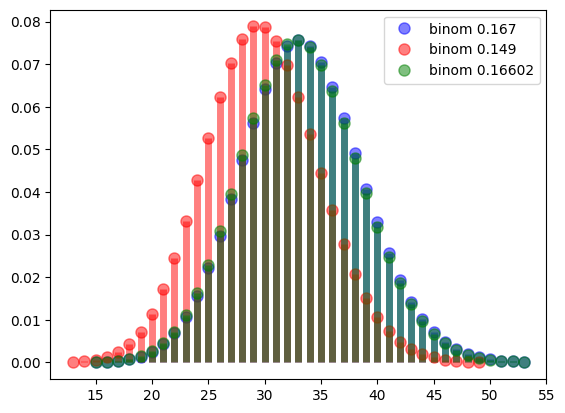

In [9]:
n=200
p=1/6
fig, ax = plt.subplots(1, 1)

x1 = np.arange(stats.binom.ppf(0.0001, n, p), stats.binom.ppf(0.9999, n, p))
ax.plot(x1, stats.binom.pmf(x1, n, p), 'bo', ms=8, label='binom 0.167', alpha=0.5)
ax.vlines(x1, 0, stats.binom.pmf(x1, n, p), colors='b', lw=5, alpha=0.5)

x2 = np.arange(stats.binom.ppf(0.0001, n, 0.149), stats.binom.ppf(0.9999, n, 0.149))
ax.plot(x2, stats.binom.pmf(x2, n, 0.149), 'ro', ms=8, label='binom 0.149', alpha=0.5)
ax.vlines(x2, 0, stats.binom.pmf(x2, n, 0.149), colors='r', lw=5, alpha=0.5)

x3 = np.arange(stats.binom.ppf(0.0001, n, 0.16602), stats.binom.ppf(0.9999, n, 0.16602))
ax.plot(x3, stats.binom.pmf(x3, n, 0.16602), 'go', ms=8, label='binom 0.16602', alpha=0.5)
ax.vlines(x3, 0, stats.binom.pmf(x3, n, 0.16602), colors='g', lw=5, alpha=0.5)

plt.legend()
plt.show()

# Problem 5: Hamtaro and the new AC company



In a datacenter for HamHub, Hamtaro tried to control the temperature of the cloud storage room so that the failure rate of storage disks is as low as possible. Later, a new company came to him and offered a new AC system that, in theory, could provide a more stable room temperature. To strengthen their claim, the company sends the historical room temperature of the new AC, of which the target temperature is set 15, to Hamtaro.

Given that Hamtaro's existing AC provides the room temperature of $t \sim \mathcal{N}(15, 0.5^2)$:

1. Formulate the null and alternative hypotheses for determining whether the new AC is better than the existing one or not. List your assumptions that are required to make this experiment possible.
2. Can you decide which AC system is better? Justify your answer.


## Answer 1

$H_0: \sigma^2=0.5^2$ \
$H_A: \sigma^2 < 0.5^2$

We need to do Chi-squared test for variance in a normal population:

$T = (N-1)/(s/\sigma)^2$. Test for $T < \chi^2_{\alpha,N-1}$.

Choice of significant level: 0.05, 0.01, 0.001.

**Furthur reading: https://online.stat.psu.edu/stat415/lesson/12/12.1**

In [10]:
temp_log = np.array([14.66017243, 14.82134507, 14.75354867, 15.02847413, 15.96338554,
       15.46598137, 15.35605532, 14.91048177, 15.13237189, 14.38789873,
       15.76833691, 14.85383663, 15.28335022, 15.06718901, 15.44364169,
       14.29511914, 15.13458572, 14.57428013, 15.14885716, 14.08580661,
       15.6006654 , 14.98109974, 14.95059512, 14.91460432, 14.68809902,
       15.4988617 , 14.99646465, 15.00654947, 14.65024467, 15.20684546,
       15.540787  , 15.39207656, 14.53129171, 14.27527689, 14.37856735,
       15.4685476 , 14.94268835, 15.28311368, 14.8878152 , 15.52350034,
       14.35791689, 15.11741279, 15.41721681, 15.56690632, 15.30108101,
       14.7138976 , 15.39536719, 15.02994055, 14.74887633, 14.81419334,
       15.36735467, 14.89706838, 14.89134826, 15.19781408, 15.3273354 ,
       15.16729623, 14.82748547, 15.59488402, 15.49763473, 15.12876929,
       14.11446324, 14.61298282, 14.57006854, 15.13227246, 14.68369474,
       14.96443757, 15.73872741, 15.48498884, 15.35770021, 15.13471147,
       14.94871779, 13.91322937, 14.84786617, 14.42086587, 15.26216287,
       14.33225067, 14.94179209, 14.57095395, 15.1261513 , 14.93201265,
       14.82252959, 15.19061294, 15.33257912, 14.72448901, 15.54406202,
       14.72704346, 14.9902773 , 14.71477903, 14.90866689, 14.28862563,
       15.04302902, 15.06973955, 14.51951387, 14.61413562, 14.58725869,
       14.41407727, 15.05585075, 14.69229146, 14.30425173, 14.76913898,
       14.27819269, 14.93917912, 14.22675051, 15.20964   , 14.96122782,
       14.05371218, 15.10273752, 15.50886439, 15.43965366, 14.98863063,
       15.34326459, 15.23694786, 13.90170147, 15.29660252, 15.26635161,
       15.34710713, 14.34928594, 15.61509746, 15.80476574, 15.36769161,
       14.52027993, 14.80624255, 14.58269606, 15.58830065, 14.25665696,
       14.86914893, 15.40500584, 15.28855103, 15.43907472, 15.18196326,
       15.47088551, 15.06327054, 15.01022434, 14.43508736, 15.3791887 ,
       14.86202479, 15.1697766 , 14.6434633 , 15.7263277 , 14.31813452,
       15.30657752, 14.91471004, 15.1456617 , 14.93856484, 15.14098396,
       14.76996958, 15.3890821 , 15.53549397, 15.28528007, 15.61416247,
       14.4514347 , 14.75105769, 14.22367585, 14.93898327, 14.61033024,
       14.96348807, 15.24771829, 14.84653005, 15.36780845, 14.96846837,
       14.66094081, 14.75905691, 14.96864336, 15.55687252, 14.62138304,
       16.02201637, 14.95786084, 14.98549356, 15.18029872, 14.82305383,
       15.093562  , 15.98065684, 15.27950419, 15.42169411, 15.66950953,
       14.90725077, 13.69523862, 15.7470953 , 14.93824139, 15.65590845,
       14.69911713, 14.63306529, 15.09566097, 15.00531748, 15.0664824 ,
       15.00496274, 15.1577527 , 15.26365236, 14.98708579, 14.43256043,
       15.5816707 , 14.69227952, 15.22774367, 15.01510129, 15.03105086,
       15.07222669, 15.22579141, 15.34835664, 15.14017702, 15.12604511])

In [11]:
# Answer 2
s2 = calculate_sample_variance(temp_log)
t_score = (len(temp_log)-1)*(s2/0.25)
pvalue = stats.chi2.cdf(t_score, len(temp_log)-1)

print('Old variance: 0.25')
print('New variance: {}'.format(s2))
print('pvalue = {}'.format(pvalue))
# Hamtaro can reject H0 using the significant level of 0.05 and 0.01.
# This means the the new system has lower variance, and is the better system.

Old variance: 0.25
New variance: 0.18217927406414045
pvalue = 0.0015161592411656664


#Problem 6: Hamtaro Empire

Hamtaro also have a factory. He tried to boost the factory productivity by replacing the old machines with a new type-II variant. However, there is a concern from the local factory managers that Hamtaro might get bamboozled, since they do not observe an increase in productivity compared to the previous one. Therefore, to ease their concern, he decided to conduct a z-testing.

Given that the number of goods produced each day by the old machines was $x \sim \mathcal{N}(5000, 20^2)$ :

1. Formulate the null and alternative hypothesis for determining whether the new machine is better than the previous one at a significant level = 0.05.
2. From the testing, can Hamtaro conclude that factory productivity increased as a whole?
3. Can Hamtaro say the same for each individual factory?
4. Repeat 1-3 again but with a t-test. Is there any difference from the z-test? What, and why does it happen?

In [12]:
from scipy.stats import norm
import numpy as np

# 30 days of product quantity in 4 factories

fac_0 = np.array([4993.89323126, 5021.67118211, 5023.54710937, 4999.11746331,
       5001.53450095, 4986.27990953, 4987.12362188, 5004.91535087,
       4999.97591193, 5038.09176163, 4993.94184053, 5026.5264468 ,
       5040.62862593, 4979.91124088, 5008.59143715, 5016.45331659,
       5013.63203948, 5010.84253735, 5014.99772195, 5002.39462129,
       5047.80507624, 5007.23005532, 5019.87205007, 5005.76363012,
       4997.09106036, 4982.80291132, 5037.18158407, 4996.54197735,
       5007.57964251, 4971.18880247])

fac_1 = np.array([5036.80041897, 4989.33779117, 4971.68709581, 5041.92493487,
       5041.64823146, 5026.33602398, 5009.58334612, 4989.05382998,
       5031.17423169, 4992.20198911, 4970.63425555, 5007.17615704,
       4993.84416738, 5028.59671588, 5009.91388156, 5049.64187466,
       5015.12711371, 5032.2900513 , 5013.66869347, 4988.21257317,
       5020.44276181, 4985.62886808, 5022.46800468, 5042.35501669,
       5001.6153908 , 5012.14209858, 5006.14666402, 4999.93219541,
       5002.77927647, 5002.20750425])

fac_2 = np.array([5029.95293241, 5019.47959949, 4976.8427836 , 4985.22792264,
       4994.97618684, 5026.75059569, 5015.71350753, 5008.46632673,
       5037.96915682, 4990.38948551, 4988.7082206 , 5032.42440206,
       5036.41040953, 5003.75236158, 5002.62361815, 4998.8932057 ,
       5000.51153033, 5002.19196574, 5023.74534474, 5032.03601587,
       5000.10614764, 4989.74566985, 4985.97436664, 4973.63380449,
       5028.58100504, 4997.8426781 , 5011.4202198 , 5018.71432385,
       4969.03296199, 5009.23456565])
fac_3 = np.array([4962.36508403, 5015.91734917, 5030.86885403, 5012.74787091,
       5036.94455211, 4995.2103757 , 5029.84241184, 5015.68062582,
       4996.43546786, 4999.57614716, 5006.88735305, 5035.10432486,
       5017.33437936, 5006.70625696, 5007.97827037, 4981.80482708,
       5020.78603239, 4993.12742287, 4996.10718141, 4988.00315629,
       5003.00004152, 4949.54117305, 5008.6250048 , 5004.09075453,
       5026.56246304, 5011.02296759, 5010.67413795, 4990.58062539,
       5009.64435703, 5001.9413428 ])


## Answer.

1. $H_0:$ new_mean = old_mean\
$H_A:$ new_mean > old_mean

In [13]:
# Problem 2
prev_mean = 5000
prev_var = 20**2

def RHS_p_value(fac):
  new_var = 20**2/len(fac)
  z = (fac.mean()-prev_mean) / (new_var**0.5)
  p_value = 1-norm.cdf(z)
  return p_value

print('p-value as a whole = {}'.format(RHS_p_value(np.concatenate([fac_0, fac_1, fac_2, fac_3]))))
# The machines are better


p-value as a whole = 1.1354014685771574e-05


In [14]:
# Problem 3
print('p-value for factory 0 = {}'.format(RHS_p_value(fac_0)))
print('p-value for factory 1 = {}'.format(RHS_p_value(fac_1)))
print('p-value for factory 2 = {}'.format(RHS_p_value(fac_2)))
print('p-value for factory 3 = {}'.format(RHS_p_value(fac_3)))

# Even if factory 3 cannot reject null hypothesis at significant level 0.05, e cannot conclude that factory has the same productivity as the previous.

p-value for factory 0 = 0.015206852813733351
p-value for factory 1 = 0.0011282972610209274
p-value for factory 2 = 0.040336840487064096
p-value for factory 3 = 0.0658734743204481


4. T-test: same null and alternate hypothesis.

In [15]:
# Problem 4 code:

def RHS_p_value_t(fac):
  n = len(fac)
  new_var = ((fac-fac.mean())**2).sum()/(n-1)
  t_val = (fac.mean()-5000)/(new_var**0.5 / np.sqrt(n))
  p_value = 1-stats.t.cdf(t_val, n-1)
  return p_value

print('p-value as a whole = {}'.format(RHS_p_value_t(np.concatenate([fac_0, fac_1, fac_2, fac_3]))))
print('p-value for factory 0 = {}'.format(RHS_p_value_t(fac_0)))
print('p-value for factory 1 = {}'.format(RHS_p_value_t(fac_1)))
print('p-value for factory 2 = {}'.format(RHS_p_value_t(fac_2)))
print('p-value for factory 3 = {}'.format(RHS_p_value_t(fac_3)))

# Same result as using z-test. Factory 3 cannot reject null hypothesis again.


p-value as a whole = 1.4980212512005764e-05
p-value for factory 0 = 0.013599797606286934
p-value for factory 1 = 0.0036764678223550895
p-value for factory 2 = 0.04077133002863409
p-value for factory 3 = 0.06493877130251391
